In [91]:
import pandas as pd 
df = pd.read_csv(r"C:\Users\abhi1\Desktop\DS-Intern-Assignment-Abhinav-Gupta\data\data.csv")
df.head(1)

,timestamp,equipment_energy_consumption,lighting_energy,zone1_temperature,zone1_humidity,zone2_temperature,zone2_humidity,zone3_temperature,zone3_humidity,zone4_temperature,...,zone9_temperature,zone9_humidity,outdoor_temperature,atmospheric_pressure,outdoor_humidity,wind_speed,visibility_index,dew_point,random_variable1,random_variable2
0,2016-01-11 17:00:00,60.0,-77.78778596503064,33.74660933896648,47.59666666666671,19.2,44.79,19.79,NaN,19.0,...,17.033333,45.53,6.6,733.5,92.0,7.0,63.0,5.3,13.275433,13.275433


In [92]:
# extracting hour from timestamp column
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['hour'] = df['timestamp'].dt.hour.astype('float')
df.drop('timestamp', axis=1, inplace=True)
# df.head()

In [93]:
# df.info()

In [94]:
# Convert each object column to float 
text_columns = df.select_dtypes(include='object').columns
df[text_columns] = df[text_columns].apply(lambda col: pd.to_numeric(col, errors='coerce'))
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16857 entries, 0 to 16856
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   equipment_energy_consumption  15945 non-null  float64
 1   lighting_energy               15993 non-null  float64
 2   zone1_temperature             15908 non-null  float64
 3   zone1_humidity                15969 non-null  float64
 4   zone2_temperature             15934 non-null  float64
 5   zone2_humidity                15990 non-null  float64
 6   zone3_temperature             16055 non-null  float64
 7   zone3_humidity                15979 non-null  float64
 8   zone4_temperature             16041 non-null  float64
 9   zone4_humidity                16076 non-null  float64
 10  zone5_temperature             16019 non-null  float64
 11  zone5_humidity                16056 non-null  float64
 12  zone6_temperature             16009 non-null  float64
 13  z

In [95]:
df.isnull().sum()

equipment_energy_consumption    912
lighting_energy                 864
zone1_temperature               949
zone1_humidity                  888
zone2_temperature               923
zone2_humidity                  867
zone3_temperature               802
zone3_humidity                  878
zone4_temperature               816
zone4_humidity                  781
zone5_temperature               838
zone5_humidity                  801
zone6_temperature               848
zone6_humidity                  847
zone7_temperature               794
zone7_humidity                  805
zone8_temperature               848
zone8_humidity                  777
zone9_temperature               773
zone9_humidity                  888
outdoor_temperature             806
atmospheric_pressure            842
outdoor_humidity                799
wind_speed                      828
visibility_index                815
dew_point                       826
random_variable1                826
random_variable2            

In [96]:
df.shape

(16857, 29)

In [97]:
# Remove rows where the target is missing
df = df.dropna(subset=['equipment_energy_consumption'])
df.shape

(15945, 29)

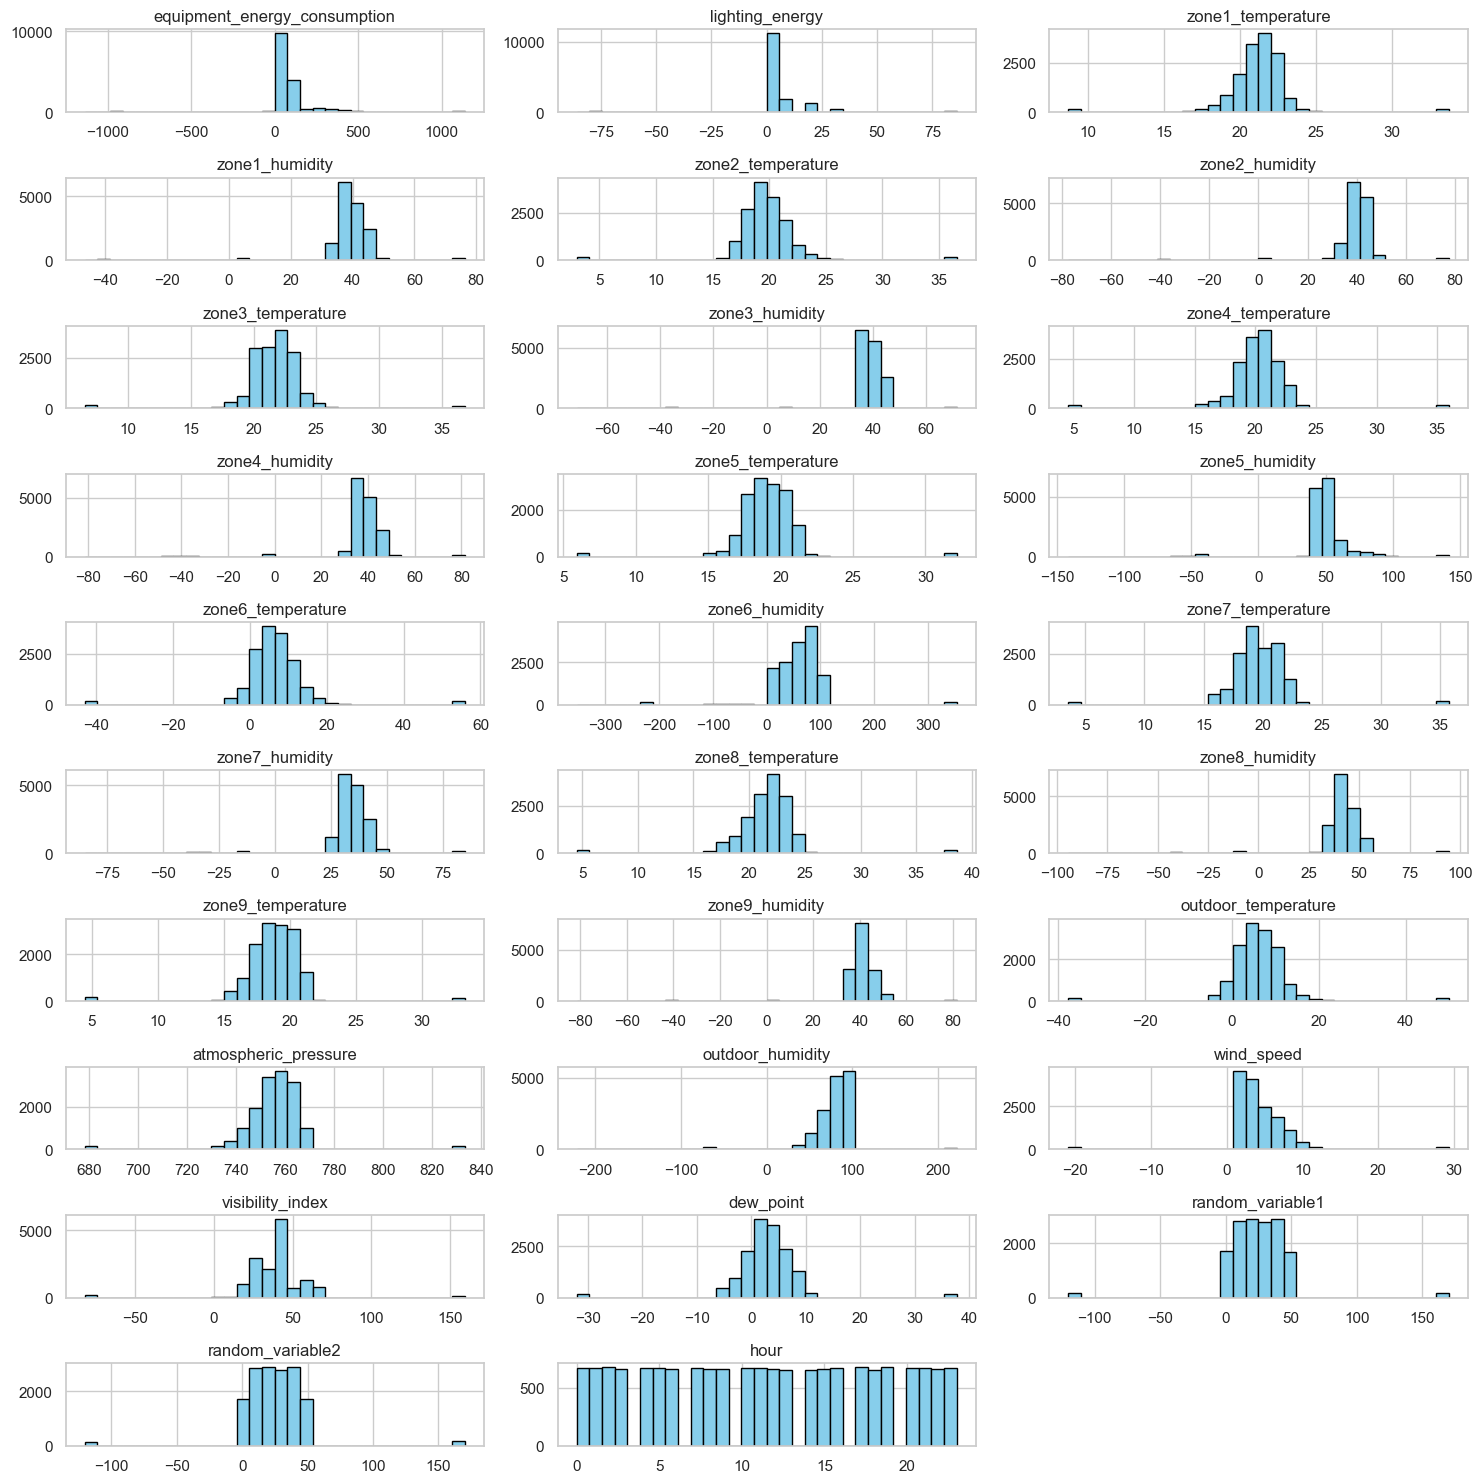

In [102]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 15))
for i, column in enumerate(df.columns, 1):
    plt.subplot(len(df.columns) // 3 + 1, 3, i)
    plt.hist(df[column].dropna(), bins=30, color='skyblue', edgecolor='black')
    plt.title(column)
    plt.grid(True)

plt.tight_layout()
plt.show()


In [104]:
df.skew().sort_values()


zone3_humidity                 -5.481574
zone1_humidity                 -4.638634
zone9_humidity                 -4.407771
zone2_humidity                 -4.383365
zone4_humidity                 -3.365544
zone8_humidity                 -3.009099
zone7_humidity                 -2.605690
outdoor_humidity               -2.013892
zone5_humidity                 -1.185781
zone4_temperature              -0.351604
zone3_temperature              -0.257828
visibility_index               -0.159578
random_variable1               -0.151376
zone6_humidity                 -0.124386
zone9_temperature              -0.103714
dew_point                      -0.054598
atmospheric_pressure           -0.027607
hour                            0.001697
zone1_temperature               0.034708
zone5_temperature               0.064108
wind_speed                      0.107928
zone6_temperature               0.113976
random_variable2                0.198469
zone8_temperature               0.200556
lighting_energy 

In [ ]:
# replacing null value with median whose skewness is > 0.5 or < -0.5 and 
# with mean whose skewness is -0.5<skewness< 0.5 
skewness = df.skew()

for i in df.columns:
    if df[i].isnull().sum() > 0:
        if abs(skewness[i]) > 0.5:
            df[i].fillna(df[i] == df[i].median(), inplace=True)
        else:
            df[i].fillna(df[i] == df[i].mean() , inplace=True)

In [109]:
df.isnull().sum()

equipment_energy_consumption    0
lighting_energy                 0
zone1_temperature               0
zone1_humidity                  0
zone2_temperature               0
zone2_humidity                  0
zone3_temperature               0
zone3_humidity                  0
zone4_temperature               0
zone4_humidity                  0
zone5_temperature               0
zone5_humidity                  0
zone6_temperature               0
zone6_humidity                  0
zone7_temperature               0
zone7_humidity                  0
zone8_temperature               0
zone8_humidity                  0
zone9_temperature               0
zone9_humidity                  0
outdoor_temperature             0
atmospheric_pressure            0
outdoor_humidity                0
wind_speed                      0
visibility_index                0
dew_point                       0
random_variable1                0
random_variable2                0
hour                            0
dtype: int64